In [2]:
from google.colab import drive
drive.mount("/content/drive")
path =  "/content/drive/Shareddrives/AI_project/"

Mounted at /content/drive


In [3]:
#!pip install pygal
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
from collections import defaultdict
import numpy as np
import pandas as pd

In [ ]:
media_name = ["chinatimes","cna","cts","ebc","ettoday","ltn", "setn"]

media_cnt = 7
m_pos = []
m_nu = []
m_neg = []

m_pos2 = []
m_nu2 = []
m_neg2 = []

In [ ]:


for media in media_name:
  dir_path = path + 'result/'+media+"/"
  
  '''
  count_path1 = dir_path + media + ".txt"
  p1_path = dir_path + media + "pos.csv"
  #nu1_path = dir_path + media + "nu.csv"
  neg1_path = dir_path + media + "neg.csv"
  df_p = pd.read_csv(p1_path)
  #df_nu = pd.read_csv(nu1_path)
  df_neg = pd.read_csv(neg1_path)
  '''
  
  count_path2 = dir_path + "Demo_.txt"
  p2_path = dir_path + "Demo_pos.csv"
  #nu2_path = dir_path + "Demo_nu.csv"
  neg2_path = dir_path + "Demo_neg.csv"
  df_p = pd.read_csv(p2_path)
  #df_nu = pd.read_csv(nu2_path)
  df_neg = pd.read_csv(neg2_path)
  
  '''
  read_cnt = open(count_path1, 'r')
  cnt_all = (read_cnt.read().split())
  Total = 0
  for i in range(2) : Total+=(int)(cnt_all[i])
  m_pos.append(100*(int)(cnt_all[0])/Total)
  #m_nu.append(100*(int)(cnt_all[1])/Total)
  m_neg.append(100*(int)(cnt_all[2])/Total)
  read_cnt.close()
  '''

  read_cnt = open(count_path2, 'r')
  cnt_all = (read_cnt.read().split())
  Total = 0
  for i in range(2) : Total+=(int)(cnt_all[i])
  m_pos2.append(100*(int)(cnt_all[0])/Total)
  #m_nu2.append(100*(int)(cnt_all[1])/Total)
  m_neg2.append(100*(int)(cnt_all[1])/Total)
  read_cnt.close()



        media        pos        neg
6        setn  13.500000  86.500000
5         ltn  11.000000  89.000000
4     ettoday  11.500000  88.500000
3         ebc   6.250000  93.750000
2         cts   6.097561  93.902439
1         cna  23.000000  77.000000
0  chinatimes   8.500000  91.500000


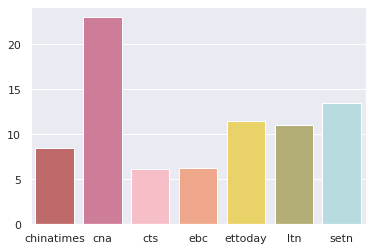

In [ ]:

#===========
select_type = 2
#===========

results = defaultdict(list)

if select_type == 1 :
  results['media'] = media_name 
  #results['nu'] = m_nu
  results['pos'] = m_pos
  results['neg'] = m_neg
else:
  results['media'] = media_name 
  #results['nu'] = m_nu2
  results['pos'] = m_pos2
  results['neg'] = m_neg2

df = pd.DataFrame(results)
df = df.iloc[::-1]
print(df)


customPalette = sns.color_palette(["#cd5c5c","#db7093","#ffb6c1","#ffa07a","#FFE153","#bdb76b","#b0e0e6","#87ceeb"]) # 輸入rgb
ax = sns.barplot(y= 'pos', x = 'media', data = results,palette=customPalette)
sns.set(style="white", context="talk")
sns.set(font="SimSun")

#plt.show()
plt.savefig(path+"/result/BERT_pos_rate.png")
#df.plot(x='media', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')

#Custom Input

In [8]:
media="cts"

method = 2

In [9]:
import pandas as pd
import numpy as np

dir_path = path + 'result/'+media+"/"
if method==1:
  count_path1 = dir_path + media + ".txt"
  p1_path = dir_path + media + "pos.csv"
  #nu1_path = dir_path + media + "nu.csv"
  neg1_path = dir_path + media + "neg.csv"
  read_cnt = open(count_path1, 'r')
  df_p = pd.read_csv(p1_path)
  #df_nu = pd.read_csv(nu1_path)
  df_neg = pd.read_csv(neg1_path)

elif method==2:
  count_path2 = dir_path + "Demo_.txt"
  p2_path = dir_path + "Demo_pos.csv"
  #nu2_path = dir_path + "Demo_nu.csv"
  neg2_path = dir_path + "Demo_neg.csv"
  df_p = pd.read_csv(p2_path)
  #df_nu = pd.read_csv(nu2_path)
  df_neg = pd.read_csv(neg2_path)

print("===================================================")
if method==1:
  read_cnt = open(count_path1, 'r')
else:
  read_cnt = open(count_path2, 'r')

cnt_all = (read_cnt.read().split())
Total = 0
for i in range(2) : Total+=(int)(cnt_all[i])

print("pos : ", 100*(int)(cnt_all[0])/Total, "%  "," neg : ",100*(int)(cnt_all[1])/Total,"%")
print("pos : ", (int)(cnt_all[0]), " "," neg : ",(int)(cnt_all[1]),)
read_cnt.close()
print("===================================================")

pos :  6.097560975609756 %    neg :  93.90243902439025 %
pos :  5    neg :  77


In [5]:
!pip install snownlp
from snownlp import SnowNLP

     |████████████████████████████████| 37.6MB 78kB/s 
  Created wheel for snownlp: filename=snownlp-0.12.3-cp37-none-any.whl size=37760967 sha256=c92e46c583ba36a4028be497b5a7f76c9229150caa17fc1ba354d1cdd7b6579a
  Stored in directory: /root/.cache/pip/wheels/f3/81/25/7c197493bd7daf177016f1a951c5c3a53b1c7e9339fd11ec8f
Successfully built snownlp


In [10]:

print("===================================================")
print("\nPositive News:\n")
for line in df_p['0'][:10]:
  s = SnowNLP(line)
  print(s.han) #col名稱叫'0'
print("\n===================================================")

print("\nNegative News:\n")
for line in df_neg['0'][:10]:
  s = SnowNLP(line)
  print(line) #col名稱叫'0'
print("\n===================================================")



Positive News:

全国三级警戒延长 汉光演习确定延后
做好大量施打准备！苏贞昌：8月底前1千万剂到位
台中邻长明起可打疫苗 卢秀燕吁孕妇优先接种莫德纳
为G7暖身 拜登抵英国开心会强森
8月千万疫苗到位 苏揆:将大规模施打!


Negative News:

府：蔡总统未曾说过泰国政府「阻挡」疫苗出口
纾困每人普发1万现金？苏揆：钱是非常有限的
提案删艺文纾困经费遭轰！叶毓兰道歉「宣布撤案」
贾永婕募款捐赠「救命神器」 蔡英文深夜回应了
柯喊部分解封 侯友宜:新北无重开条件
7成5不满防疫表现 柯:人在做天在看
郭台铭盼会见蔡英文 总统府火速回应了
好心肝违规 暴露北市疫苗分配没审查?
郭台铭争取购买BNT疫苗 柯建铭曝每剂单价「42美元」
挨批疫苗打太慢 柯:800瓶为中央寄放



findfont: Font family ['SimSun'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimSun'] not found. Falling back to DejaVu Sans.


              name    Acc
3  SnowNLP (Bayes)  60.36
2            XLNet  72.07
1             BERT  78.38
0             LSTM  63.06


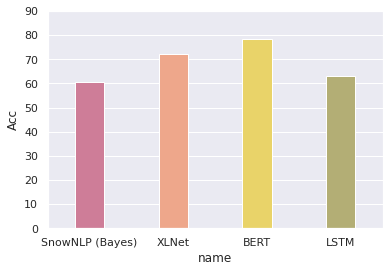

In [11]:
# 比較

Model_name = ["LSTM","BERT","XLNet","SnowNLP (Bayes)"]
Acc = [63.06,78.38,72.07,60.36,] #%

Compare = defaultdict(list)
Compare['name'] = Model_name
Compare['Acc'] = Acc

Cmp_df = pd.DataFrame(Compare)
Cmp_df = Cmp_df.iloc[::-1]
print(Cmp_df)


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


customPalette = sns.color_palette(["#db7093","#ffa07a","#FFE153","#bdb76b","#b0e0e6","#87ceeb"]) # 輸入rgb
ax = sns.barplot(y= 'Acc', x = 'name', data = Cmp_df,palette=customPalette)
change_width(ax, .35)
plt.ylim(0, 90)
sns.set(style="white", context="talk")
sns.set(font="SimSun")
plt.savefig(path+"/result/Cmp_Model.png")